In [83]:
#!pip install ydata-profiling

In [84]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [85]:
df = pd.read_excel('furniture sales\Sample - Superstore-newdate.xlsx')
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
1       2  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
2       3  CA-2016-138688 2022-06-11 2022-06-15    Second Class    DV-13045   
3       4  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   
4       5  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [86]:
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()

In [87]:
df['per_unit_price'] = df['Sales'] / df['Quantity']
df['per_unit_profit'] = df['Profit'] / df['Quantity']
df['Profit_margin'] = df['Profit'] / df['Sales']
df['Original_Price'] = df['Sales'] / (1 - df['Discount'])
df['original_per_unit_price'] = df['Original_Price'] / df['Quantity']

In [88]:
df['order_month'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year

In [89]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
1       2  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
2       3  CA-2016-138688 2022-06-11 2022-06-15    Second Class    DV-13045   
3       4  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   
4       5  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Quantity  \
0      Claire Gute   Consumer  United States        Henderson  ...        2   
1      Claire Gute   Consumer  United States        Henderson  ...        3   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...        2   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        5   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        2   

   Discount    Profit per_unit_price per_unit_prof

In [90]:
pd.set_option('display.max_rows', None)
df['original_per_unit_price'].value_counts().sort_index(ascending=True)

0.99         2
0.99         5
0.99         3
1.14         3
1.24         5
1.26         5
1.34         1
1.39         1
1.39         2
1.48         4
1.48         3
1.60         3
1.64         4
1.64         1
1.68         1
1.68        13
1.68         5
1.74         5
1.76        23
1.76         3
1.78         3
1.80         2
1.80         7
1.80         3
1.81         3
1.81        10
1.82         1
1.82        13
1.82         2
1.84         2
1.86         4
1.88         3
1.88        13
1.88         3
1.89         6
1.95         2
1.97         1
1.97         2
1.98         6
1.98        14
2.01         8
2.04        10
2.04         1
2.08         1
2.08        14
2.08         2
2.10         3
2.15         5
2.16         5
2.16         2
2.18        25
2.19         4
2.20         3
2.21        14
2.22         4
2.23         4
2.28         3
2.33         6
2.46         1
2.46         5
2.47         4
2.48         2
2.52         5
2.58         5
2.58         1
2.60         3
2.61      

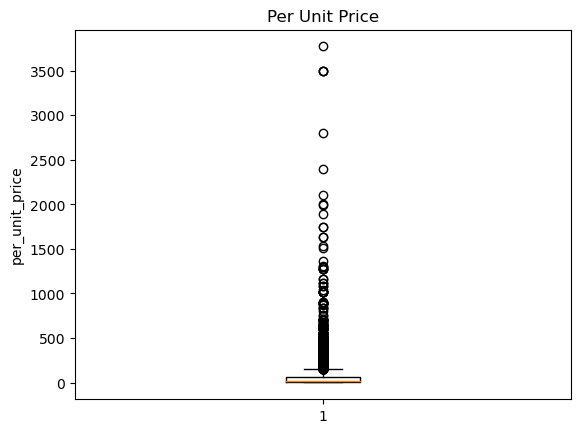

In [91]:
per_unit_price_list = df['per_unit_price'].tolist()
fig1, ax1 = plt.subplots()
ax1.set_title('Per Unit Price')
ax1.set_ylabel('per_unit_price')
ax1.boxplot(per_unit_price_list)
plt.show()

In [92]:
quartiles = df['per_unit_price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Per Unit Price is: {lowerq}")
print(f"The upper quartile of Per Unit Price is: {upperq}")
print(f"The interquartile range of Per Unit Price is: {iqr}")
print(f"The the median of Per Unit Price is: {quartiles[0.5]} ")

lower_bound_per_unit_price = lowerq - (1.5*iqr)
upper_bound_per_unit_price = upperq + (1.5*iqr)
print(f"Values below {lower_bound_per_unit_price} could be outliers.")
print(f"Values above {upper_bound_per_unit_price} could be outliers.")

The lower quartile of Per Unit Price is: 5.47
The upper quartile of Per Unit Price is: 63.94
The interquartile range of Per Unit Price is: 58.47
The the median of Per Unit Price is: 16.27 
Values below -82.235 could be outliers.
Values above 151.64499999999998 could be outliers.


In [93]:
df_filtered_per_unit_price = df[(df['per_unit_price'] >= lower_bound_per_unit_price) & 
                                (df['per_unit_price'] <= upper_bound_per_unit_price)]
df = df_filtered_per_unit_price

In [94]:
# Custom quantiles
quantiles = [0, .25, .5, .75, 1.]

# Using qcut with custom quantiles
df['per_unit_price_binned'] = pd.qcut(df['per_unit_price'], quantiles)

In [95]:
df = df.copy()

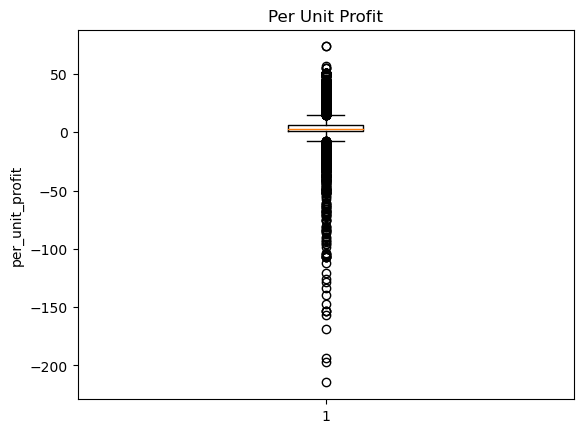

In [96]:
per_unit_profit_list = df['per_unit_profit'].tolist()
fig1, ax1 = plt.subplots()
ax1.set_title('Per Unit Profit')
ax1.set_ylabel('per_unit_profit')
ax1.boxplot(per_unit_profit_list)
plt.show()

In [97]:
quartiles = df['per_unit_profit'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Per Unit Profit is: {lowerq}")
print(f"The upper quartile of Per Unit Profit is: {upperq}")
print(f"The interquartile range of Per Unit Profit is: {iqr}")
print(f"The the median of Per Unit Profit is: {quartiles[0.5]} ")

lower_bound_per_unit_profit = lowerq - (1.5*iqr)
upper_bound_per_unit_profit = upperq + (1.5*iqr)
print(f"Values below {lower_bound_per_unit_profit} could be outliers.")
print(f"Values above {upper_bound_per_unit_profit} could be outliers.")

The lower quartile of Per Unit Profit is: 0.6993
The upper quartile of Per Unit Profit is: 6.437200000000001
The interquartile range of Per Unit Profit is: 5.737900000000001
The the median of Per Unit Profit is: 2.384500000000001 
Values below -7.907550000000001 could be outliers.
Values above 15.044050000000002 could be outliers.


In [98]:
df_filtered_per_unit_profit = df[(df['per_unit_profit'] >= lower_bound_per_unit_profit) & 
                                (df['per_unit_profit'] <= upper_bound_per_unit_profit)]
df = df_filtered_per_unit_profit

In [99]:
# Custom quantiles
quantiles = [0, .25, .5, .75, 1.]

# Using qcut with custom quantiles
df['per_unit_profit_binned'] = pd.qcut(df['per_unit_profit'], quantiles)

In [100]:
df = df.copy()

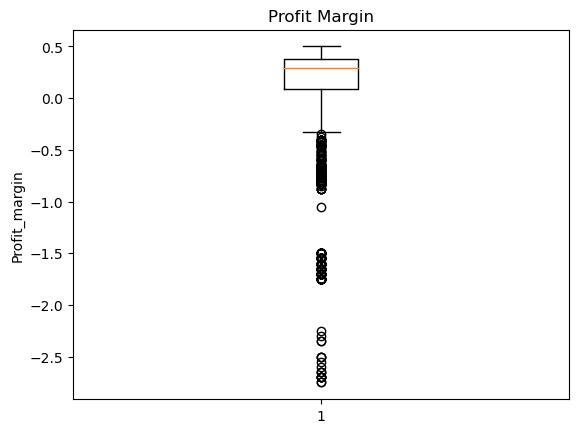

In [101]:
Profit_margin_list = df['Profit_margin'].tolist()
fig1, ax1 = plt.subplots()
ax1.set_title('Profit Margin')
ax1.set_ylabel('Profit_margin')
ax1.boxplot(Profit_margin_list)
plt.show()

In [102]:
quartiles = df['Profit_margin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Profit Margin is: {lowerq}")
print(f"The upper quartile of Profit Margin is: {upperq}")
print(f"The interquartile range of Profit Margin is: {iqr}")
print(f"The the median of Profit Margin is: {quartiles[0.5]} ")

lower_bound_Profit_margin = lowerq - (1.5*iqr)
upper_bound_Profit_margin = upperq + (1.5*iqr)
print(f"Values below {lower_bound_Profit_margin} could be outliers.")
print(f"Values above {upper_bound_Profit_margin} could be outliers.")

The lower quartile of Profit Margin is: 0.08750000000000001
The upper quartile of Profit Margin is: 0.3749999999999999
The interquartile range of Profit Margin is: 0.28749999999999987
The the median of Profit Margin is: 0.28999999999999987 
Values below -0.3437499999999998 could be outliers.
Values above 0.8062499999999997 could be outliers.


In [103]:
df_filtered_Profit_margin = df[(df['Profit_margin'] >= lower_bound_Profit_margin) & 
                                (df['Profit_margin'] <= upper_bound_Profit_margin)]
df = df_filtered_Profit_margin

In [104]:
# Custom quantiles
quantiles = [0, .25, .5, .75, 1.]

# Using qcut with custom quantiles
df['Profit_margin_binned'] = pd.qcut(df['Profit_margin'], quantiles)

In [105]:
df = df.copy()

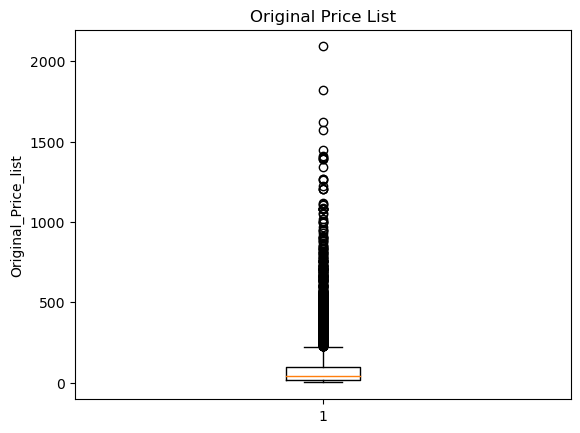

In [106]:
Original_Price_list = df['Original_Price'].tolist()
fig1, ax1 = plt.subplots()
ax1.set_title('Original Price List')
ax1.set_ylabel('Original_Price_list')
ax1.boxplot(Original_Price_list)
plt.show()

In [107]:
quartiles = df['Original_Price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Original Price List is: {lowerq}")
print(f"The upper quartile of Original Price List is: {upperq}")
print(f"The interquartile range of Original Price List is: {iqr}")
print(f"The the median of Original Price List is: {quartiles[0.5]} ")

lower_bound_Original_Price = lowerq - (1.5*iqr)
upper_bound_Original_Price = upperq + (1.5*iqr)
print(f"Values below {lower_bound_Original_Price} could be outliers.")
print(f"Values above {upper_bound_Original_Price} could be outliers.")

The lower quartile of Original Price List is: 16.52
The upper quartile of Original Price List is: 99.87
The interquartile range of Original Price List is: 83.35000000000001
The the median of Original Price List is: 38.62 
Values below -108.50500000000001 could be outliers.
Values above 224.895 could be outliers.


In [108]:
df_filtered_Original_Price = df[(df['Original_Price'] >= lower_bound_Original_Price) & 
                                (df['Original_Price'] <= upper_bound_Original_Price)]
df = df_filtered_Original_Price

In [109]:
# Custom quantiles
quantiles = [0, .25, .5, .75, 1.]

# Using qcut with custom quantiles
df['Original_Price_binned'] = pd.qcut(df['Original_Price'], quantiles)

In [110]:
df = df.copy()

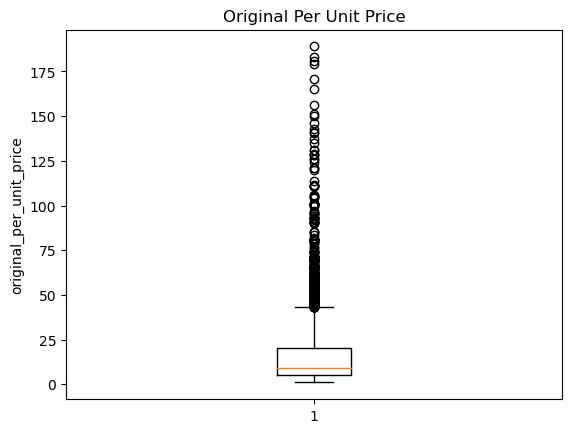

In [111]:
original_per_unit_price_list = df['original_per_unit_price'].tolist()
fig1, ax1 = plt.subplots()
ax1.set_title('Original Per Unit Price')
ax1.set_ylabel('original_per_unit_price')
ax1.boxplot(original_per_unit_price_list)
plt.show()

In [112]:
quartiles = df['original_per_unit_price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Original Per Unit Price is: {lowerq}")
print(f"The upper quartile of Original Per Unit Price is: {upperq}")
print(f"The interquartile range of Original Per Unit Price is: {iqr}")
print(f"The the median of Original Per Unit Price is: {quartiles[0.5]} ")

lower_bound_original_per_unit_price = lowerq - (1.5*iqr)
upper_bound_original_per_unit_price = upperq + (1.5*iqr)
print(f"Values below {lower_bound_original_per_unit_price} could be outliers.")
print(f"Values above {upper_bound_original_per_unit_price} could be outliers.")

The lower quartile of Original Per Unit Price is: 5.08
The upper quartile of Original Per Unit Price is: 20.24
The interquartile range of Original Per Unit Price is: 15.159999999999998
The the median of Original Per Unit Price is: 9.27 
Values below -17.659999999999997 could be outliers.
Values above 42.98 could be outliers.


In [113]:
df_filtered_original_per_unit_price = df[(df['original_per_unit_price'] >= lower_bound_original_per_unit_price) & 
                                (df['original_per_unit_price'] <= upper_bound_original_per_unit_price)]
df = df_filtered_original_per_unit_price

In [114]:
# Custom quantiles
quantiles = [0, .25, .5, .75, 1.]

# Using qcut with custom quantiles
df['original_per_unit_price_binned'] = pd.qcut(df['original_per_unit_price'], quantiles)

In [115]:
df = df.copy()

In [116]:
description = df.describe()
description

Row ID   Postal Code        Sales     Quantity     Discount  \
count  5613.000000   5613.000000  5613.000000  5613.000000  5613.000000   
mean   5000.703189  55127.741849    39.736025     3.709425     0.086692   
std    2876.110688  32895.569745    38.676422     2.133844     0.103258   
min       3.000000   1453.000000     0.990000     1.000000     0.000000   
25%    2501.000000  22153.000000    12.960000     2.000000     0.000000   
50%    5020.000000  54880.000000    25.920000     3.000000     0.000000   
75%    7468.000000  90036.000000    53.250000     5.000000     0.200000   
max    9993.000000  99301.000000   223.580000    14.000000     0.600000   

            Profit  per_unit_price  per_unit_profit  Profit_margin  \
count  5613.000000     5613.000000      5613.000000    5613.000000   
mean     11.346251       11.153341         3.124915       0.305781   
std      13.382011        9.078677         3.067022       0.159038   
min     -33.841800        0.792000        -7.301500      -0.325000   
25%       3.247200        4.410000         1.155600       0.260000   
50%       7.110000        7.380000         2.259400       0.337500   
75%      15.475200       15.930000         4.222400       0.450000   
max     103.898200       42.980000        14.842600       0.500000   

       Original_Price  original_per_unit_price  order_month   order_year  
count     5613.000000              5613.000000  5613.000000  5613.000000  
mean        43.720852                12.283656     7.801532  2021.731694  
std         42.356034                 9.985855     3.263737     1.125257  
min          0.990000                 0.990000     1.000000  2020.000000  
25%         13.970000                 4.970000     5.000000  2021.000000  
50%         28.850000                 8.140000     9.000000  2022.000000  
75%         59.950000                17.240000    11.000000  2023.000000  
max        223.650000                42.980000    12.000000  2023.000000

In [117]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2       3  CA-2016-138688 2022-06-11 2022-06-15    Second Class    DV-13045   
4       5  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   
5       6  CA-2014-115812 2020-06-07 2020-06-12  Standard Class    BH-11710   
6       7  CA-2014-115812 2020-06-07 2020-06-12  Standard Class    BH-11710   
8       9  CA-2014-115812 2020-06-07 2020-06-12  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
5  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
6  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
8  Brosina Hoffman   Consumer  United States      Los Angeles  ...   

  Profit_margin  Original_Price original_per_unit_price order_month  \
2        0.4700           14.62                    7.31           6   
4        0.1125           27.96                   13.98          10   
5        0.2900           48.86                    6.98           6   
6        0.2700            7.28                    1.82           6   
8        0.3125           23.13                    7.71           6   

  order_year per_unit_price_binned      per_unit_profit_binned  \
2       2022        (5.08, 12.536]              (2.236, 4.957]   
4       2021        (5.08, 12.536]               (0.84, 2.236]   
5       2020        (5.08, 12.536]               (0.84, 2.236]   
6       2020         (0.335, 5.08]  (-7.901000000000001, 0.84]   
8       2020        (5.08, 12.536]               (0.84, 2.236]   

   Profit_margin_binned  Original_Price_binned  original_per_unit_price_binned  
2           (0.39, 0.5]         (0.989, 14.76]                    (4.97, 8.14]  
4       (-0.326, 0.117]         (14.76, 31.68]                   (8.14, 17.24]  
5         (0.117, 0.31]         (31.68, 68.97]                    (4.97, 8.14]  
6         (0.117, 0.31]         (0.989, 14.76]                   (0.989, 4.97]  
8          (0.31, 0.39]         (14.76, 31.68]                    (4.97, 8.14]  

[5 rows x 33 columns]

In [ ]:
#To Do
#Ml choose
#Add comments
#Can we remake this into a function?